# Features visualization

## PCA method

### ViT model. `img_6K_CT_224_Gray_RG` dataset

In [1]:
import os
import csv
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
class Classes:
    def __init__(self):
        """
            The constructor/initializer for the Classes class.
            'self' refers to the instance of the class being created.
        """
        self.classes = {}  # classes names with properties
        self.columns = ["x", "y", "class_name"]
        self.points = pd.DataFrame(columns=self.columns)  # point coordinates

    def names(self):
        """ Get classes names. """
        return list(self.classes.keys())

    def properties(self, name):
        """ Get properties of the class. """
        return self.classes[name]

    def add_class(self, num_items, label, marker, facecolor, edgecolor):
        """ Add new class to the Classes class. """
        empty_df = pd.DataFrame(columns=self.points.columns)
        for _ in range(num_items):
            empty_df.loc[len(empty_df)] = [None, None, label]  # add new row
        # Concatenate the original and empty DataFrames
        self.points = pd.concat([self.points, empty_df], ignore_index=True)
        # Add new class to dictionary: key=label,
        #                              value=[marker, facecolor, edgecolor]
        self.classes[label] = [marker, facecolor, edgecolor]

    def add_point(self, i, x, y):
        """ Add point to the Classes object. """
        # Set a single cell value
        self.points.loc[i, ["x", "y"]] = x, y

    def show(self):
        """ Show Classes object data. """
        print(self.classes)  # print classes names with properties
        print()
        print(self.points)  # print point coordinates

    def coords(self, label):
        """ Get coordinate lists x=[...] and y=[...]. """
        q = f'{self.columns[2]} == "{label}"'  # "class_name" == label
        x = self.points.query(q)[self.columns[0]].values  # NumPy array
        y = self.points.query(q)[self.columns[1]].values
        return x, y


# Perform some tests
classes = Classes()  # create classes for scatter plot
classes.add_class(3, "Real",      "o", "#00FF00", "#000000C0")
classes.add_class(2, "Generated", "P", "#FF0000", "#000000C0")
classes.add_point(1, 1.0, 2.0)
classes.add_point(2, 3.0, 4.0)
classes.add_point(4, 5.0, 6.0)
classes.show()
print()
x, y = classes.coords("Real")
print(x)
print(y)

{'Real': ['o', '#00FF00', '#000000C0'], 'Generated': ['P', '#FF0000', '#000000C0']}

      x     y class_name
0  None  None       Real
1   1.0   2.0       Real
2   3.0   4.0       Real
3  None  None  Generated
4   5.0   6.0  Generated

[None 1.0 3.0]
[None 2.0 4.0]


In [3]:
def show_scatter_plot(classes, img_path, title=None):
    """ Show scatter plot using `matplotlib` library. """
    plt.figure(figsize=(10, 5))  # the whole figure size in inches

    size = 100  # marker size
    linewidths = 0.75  # line width of the marker edges
    alpha = "60"  # opacity in hexadecimal numbers: hex 80 == dec 128

    for name in classes.names():
        x, y = classes.coords(name)
        marker, facecolors, edgecolors = classes.properties(name)
        plt.scatter(
            x, y, label=name,
            marker=marker,  # marker shape
            s=size,  # marker size
            # alpha=0.4,  # opacity for the whole plot
            facecolors=f"{facecolors}{alpha}",  # face color of the markers
            edgecolors=edgecolors,  # edge color of the markers
            linewidths=linewidths,  # linewidth of the marker edges
        )
    if title is not None:
        plt.title(title, fontsize=16, y=1.0)
    plt.xlabel("First principal component", fontsize=16, y=0.005, labelpad=0)
    plt.ylabel("Second principal component", fontsize=16, x=0.005, labelpad=0)
    plt.xticks(fontsize=14, y=0.005)  # font size for numbers
    plt.yticks(fontsize=14, x=0.005)
    legend = plt.legend(fontsize=16)  # show legend
    for handle in legend.legend_handles:
        handle.set_alpha(1.0)  # set desired opacity for markers
    plt.gca().spines[["top", "right"]].set_visible(False)  # set lines invisible
    plt.tick_params(top=False, right=False)  # remove top and right ticks
    plt.tick_params(labeltop=False, labelright=False)  # remove tick labels
    plt.gca().spines[["left", "bottom"]].set_linewidth(1.5)  # set linewidth to 1.5 points

    # Adjust spacing
    # plt.tight_layout()
    plt.subplots_adjust(left=0.075, right=1.0,
                        top=0.9, bottom=0.102,
                        wspace=0.0, hspace=0.0)

    plt.margins(x=0.015, y=0.03)  # 1.5% left-right margins and 3% top-bottom margins

    plt.savefig(img_path)  # save image to PNG
    plt.show()

In [4]:
def has_header(file, num=1024):
    with open(file, 'r') as f:
        sample = f.read(num)  # read a sample of the file
    sniffer = csv.Sniffer()
    try:
        has_header = sniffer.has_header(sample)
    except Exception as e:
        print(f"Warning: {e}")
        return True
    return has_header


def get_points(fname, classes):
    """ Get points for scatter plot. """
    sep = ","  # comma as the separator
    if fname.lower().endswith(".txt"):
        sep = " "  # space as the separator
    if has_header(fname):
        df = pd.read_csv(fname, sep=sep, header=0)  # first line is the header
    else:
        df = pd.read_csv(fname, sep=sep, header=None)  # no header line
    print(f"There are {len(df)} rows in `{fname}` file.")
    # display(df.head(3))  # show first rows

    for row_tuple in df.itertuples(index=True):  # iterate through rows
        x, y = float(f"{row_tuple[1]:.2f}"), float(f"{row_tuple[2]:.2f}")
        classes.add_point(row_tuple.Index, x, y)

In [5]:
def analyse_points(classes, x_segment, separator=None):
    """ Analyse points of the scatter plot. """
    for row_tuple in classes.points.itertuples(index=True):  # iterate through rows
        x = float(f"{row_tuple.x:.2f}")
        y = float(f"{row_tuple.y:.2f}")
        class_name = row_tuple.class_name
        index = row_tuple.Index

        if separator is not None:
            if class_name == "Real":  # real
                if x > separator:
                    print(f"Real point {index} (x, y) = ({x:.2f}, {y:.2f}) has x > 0")
            elif class_name == "Generated":  # generated
                if x < separator:
                    print(f"Generated point {index} (x, y) = ({x:.2f}, {y:.2f}) has x < 0")

        # Find points inside segment
        count = 0
        if x > x_segment[0] and x < x_segment[1]:
            count += 1

        # Find upper and lower limits for scatter plot
        lower_x_limit, upper_x_limit = float("inf"), float("-inf")
        if lower_x_limit > x:
            lower_x_limit = x
        if upper_x_limit < x:
            upper_x_limit = x

    print()
    print(f"There are {count} points in {x_segment} segment.")
    print(f"Points are in x-range [{lower_x_limit:.2f}, {upper_x_limit:.2f}]")

In [6]:
TITLE = None  # title of the plot
IMG_PATH2 = None  # path to the second scatter plot, if needed


def get_points_and_show(classes, out_dir, csv_file,
                        method, model, outname,
                        title="", analyse=False, x_segment=None):
    """ Get points and show scatter plot. """
    global TITLE, IMG_PATH2  # declare intent to modify the global variables
    
    TITLE = (f"{method} presentation of features.\n"
             f"{model} model{title}")
    
    fname = f"{out_dir}/{csv_file}"
    out = f"{outname}_{model}_{method}"
    out_img1, out_img2 = f"{out}.png", f"{out}_v2.png"
    img_path1, IMG_PATH2 = f"{out_dir}/{out_img1}", f"{out_dir}/{out_img2}"
    
    get_points(fname, classes)
    show_scatter_plot(classes, img_path1, TITLE)

    if analyse:
        analyse_points(classes, x_segment, separator=0.0)

There are 2000 rows in `./outputs_ViT_real_generated/RES_PCA_COORDs_6K_RG_SOU_vs_GEN.csv` file.


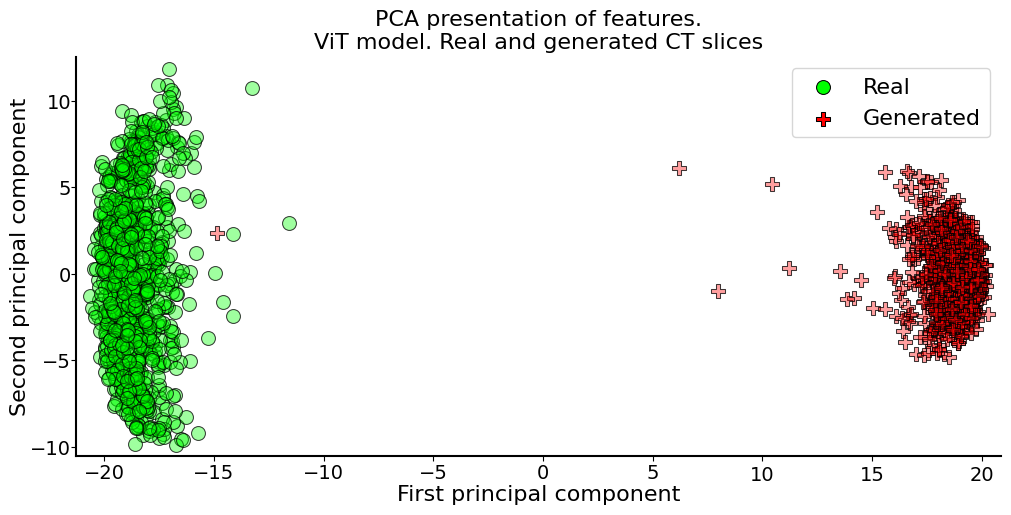

Generated point 1886 (x, y) = (-14.85, 2.35) has x < 0

There are 0 points in (-11.5, 6.2) segment.
Points are in x-range [18.86, 18.86]


In [7]:
classes = Classes()  # create classes for scatter plot
edgecolor = "#000000C0"
classes.add_class(1000, "Real",      "o", "#00FF00", edgecolor)
classes.add_class(1000, "Generated", "P", "#FF0000", edgecolor)

kwargs = {
    "out_dir":   "./outputs_ViT_real_generated",
    "csv_file":  "RES_PCA_COORDs_6K_RG_SOU_vs_GEN.csv",
    "method":    "PCA",  # method name
    "model":     "ViT",  # model name
    "classes":   classes,
    "outname":   "real_generated",
    "title":     ". Real and generated CT slices",
    "analyse":   True,  # get some info about point coordinates
    "x_segment": (-11.5, 6.2)  # segment for counting points inside it
}

get_points_and_show(**kwargs)

## Advanced visualization

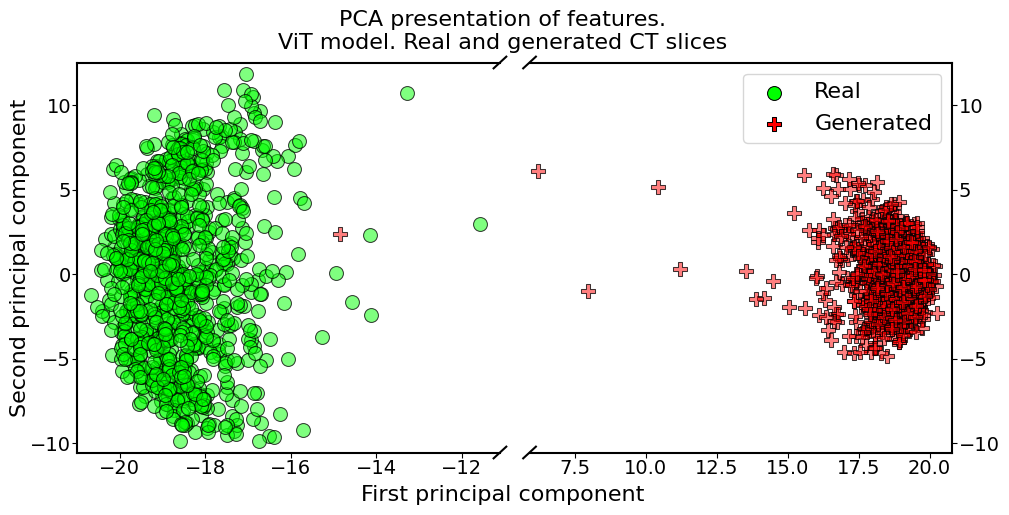

In [8]:
def show_scatter_plot_v2(classes, x_lim1, x_lim2, img_path,
                         title=None, legend_right=True):
    """
        Advanced scatter plot with broken axis example,
        where the x-axis will have a portion cut out.
        Original: https://stackoverflow.com/a/32186074/7550928
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, facecolor='w',
                                   figsize=(10, 5))
    
    ax1.set_xlim(x_lim1)  # set segments to draw plot insite them
    ax2.set_xlim(x_lim2)
    
    # hide the spines between ax1 and ax2
    ax1.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax1.yaxis.tick_left()
    ax2.yaxis.tick_right()
    ax2.tick_params(labeltop=False, labelright=True)
    
    d = .015  # how big to make the diagonal lines in axes coordinates
    kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
    ax1.plot((1-d, 1+d), ( -d,  +d), **kwargs)  # draw diagonal line
    ax1.plot((1-d, 1+d), (1-d, 1+d), **kwargs)
    
    kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
    ax2.plot((-d, +d), (1-d, 1+d), **kwargs)
    ax2.plot((-d, +d), ( -d,  +d), **kwargs)

    # Set title
    if title is not None:
        fig.suptitle(title, fontsize=16,
                     # Increase distance between title and plot.
                     y=0.995,  # also use `plt.subplots_adjust` below
                    )
    fig.supxlabel("First principal component", fontsize=16, y=0.005)
    ax1.set_ylabel("Second principal component", fontsize=16, x=0.005, labelpad=0)
    ax1.tick_params(axis='x', labelsize=14, pad=1)  # set x-tick label font size for subplot 1
    ax1.tick_params(axis='y', labelsize=14, pad=1)  # set y-tick label font size for subplot 1
    ax2.tick_params(axis='x', labelsize=14, pad=1)  # set x-tick label font size for subplot 2
    ax2.tick_params(axis='y', labelsize=14, pad=1)  # set y-tick label font size for subplot 2

    size = 100  # markers size
    linewidths = 0.75  # line width of the marker edges
    alpha = "80"  # opacity as hexadecimal number: hex 80 == dec 128

    for name in classes.names():
        x, y = classes.coords(name)
        marker, facecolors, edgecolors = classes.properties(name)
        kwargs = {"label": name,
                  "marker": marker,  # marker shape
                  "s": size,  # marker size
                  "facecolors": f"{facecolors}{alpha}",  # face color of the markers
                  "edgecolors": edgecolors,  # edge color of the markers
                  "linewidths": linewidths,  # linewidth of the marker edges
                 }
        # Plot the same data on both axes
        ax1.scatter(x, y, **kwargs)
        ax2.scatter(x, y, **kwargs)

    # Adjust spacing
    # plt.tight_layout()
    plt.subplots_adjust(left=0.075, right=0.95,
                        top=0.89, bottom=0.11,
                        wspace=0.07, hspace=0.0)
    x, y = 0.01, 0.03  # 1% left-right margins and 3% top-bottom margins
    ax1.margins(x=x, y=y)
    ax2.margins(x=x, y=y)

    # 1) legend_right=None --> no legend;
    # 2) legend_right=True --> right legend;
    # 3) legend_right=False --> left legend;
    # 4) legend_right="both" --> left AND right legends.
    if legend_right is None:
        pass  # no legend to show
    if legend_right is True or legend_right == "both":
        legend = ax2.legend(fontsize=16)  # set legend only for the second subplot
        for handle in legend.legend_handles:
            handle.set_alpha(1.0)  # set desired opacity for markers
    if legend_right is False or legend_right == "both":
        legend = ax1.legend(fontsize=16)  # set legend only for the first subplot
        for handle in legend.legend_handles:
            handle.set_alpha(1.0)  # set desired opacity for markers

    w = 1.5  # line width of the axes
    for spine in ax1.spines.values():  # adjust spine linewidth for each subplot
        spine.set_linewidth(w)  # set linewidth to 1.5 points
    for spine in ax2.spines.values():
        spine.set_linewidth(w)

    plt.savefig(img_path)  # save image to PNG
    plt.show()


x_lim1, x_lim2 = (-21, -11.1), (5.9, 20.8)  # segments to draw plot insite them
show_scatter_plot_v2(classes, x_lim1, x_lim2, IMG_PATH2, TITLE)

### ResNet model. `img_6K_CT_224_Gray_RG` dataset. Real and Generated are changed by places

There are 2000 rows in `./outputs_ResNet_real_generated/ResNet_RG_coord_PCA.txt` file.


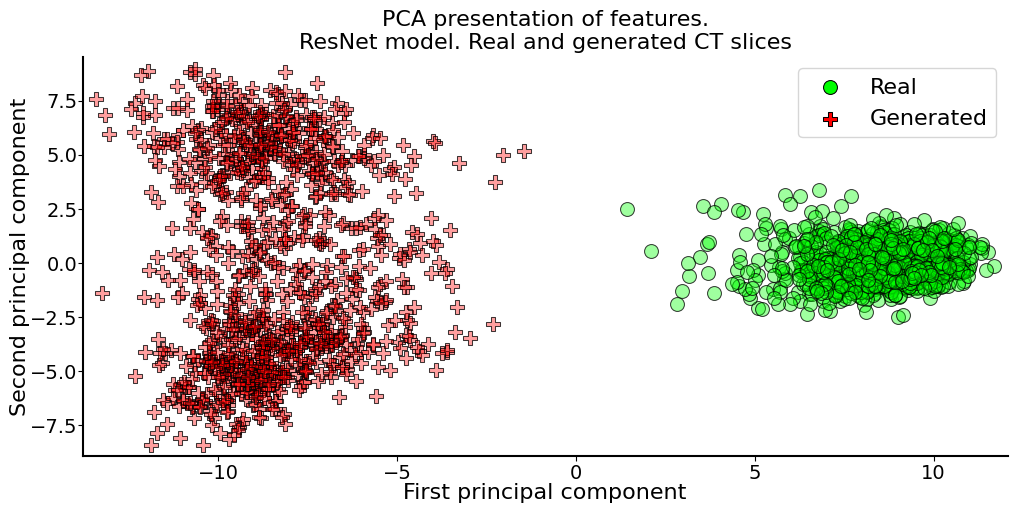

In [9]:
classes = Classes()  # create classes for scatter plot
edgecolor = "#000000C0"
classes.add_class(1000, "Real",      "o", "#00FF00", edgecolor)
classes.add_class(1000, "Generated", "P", "#FF0000", edgecolor)

kwargs = {
    "out_dir":   "./outputs_ResNet_real_generated",
    "csv_file":  "ResNet_RG_coord_PCA.txt",
    "method":    "PCA",  # method name
    "model":     "ResNet",  # model name
    "classes":   classes,
    "outname":   "real_generated",
    "title":     ". Real and generated CT slices",
}

get_points_and_show(**kwargs)

### VAE model. `img_6K_CT_224_Gray_RG` dataset

There are 2000 rows in `./outputs_VAE_real_generated/VAE_RES_PCA_COORDs_6K_RG_SOU_vs_GEN.txt` file.


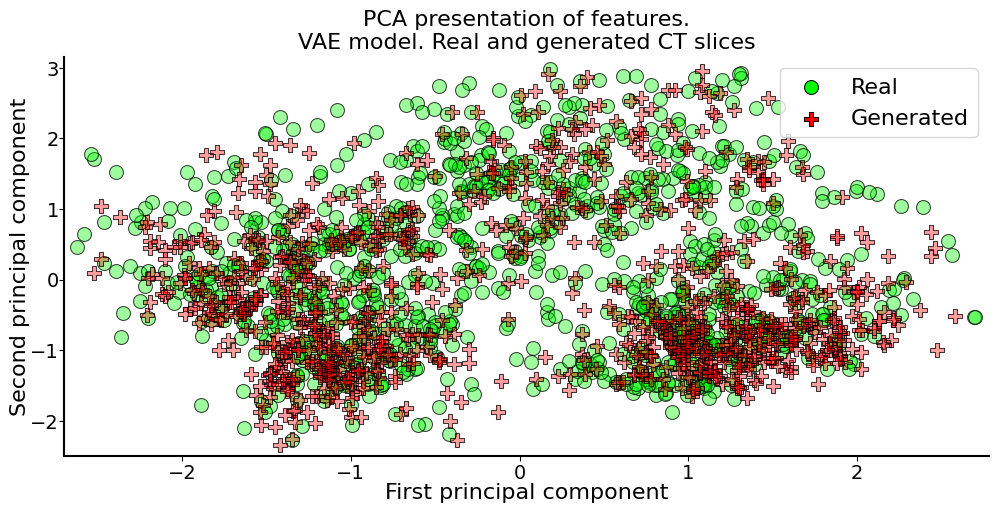

In [10]:
classes = Classes()  # create classes for scatter plot
edgecolor = "#000000C0"
classes.add_class(1000, "Real",      "o", "#00FF00", edgecolor)
classes.add_class(1000, "Generated", "P", "#FF0000", edgecolor)

kwargs = {
    "out_dir":   "./outputs_VAE_real_generated",
    "csv_file":  "VAE_RES_PCA_COORDs_6K_RG_SOU_vs_GEN.txt",
    "method":    "PCA",  # method name
    "model":     "VAE",  # model name
    "classes":   classes,
    "outname":   "real_generated",
    "title":     ". Real and generated CT slices",
}

get_points_and_show(**kwargs)

### ViT model. `img_CT_224_Gray_MF_c1_c2_c3` dataset

There are 900 rows in `./outputs_ViT_c1_c2_c3/ViT_c1c2c3_PCA.txt` file.


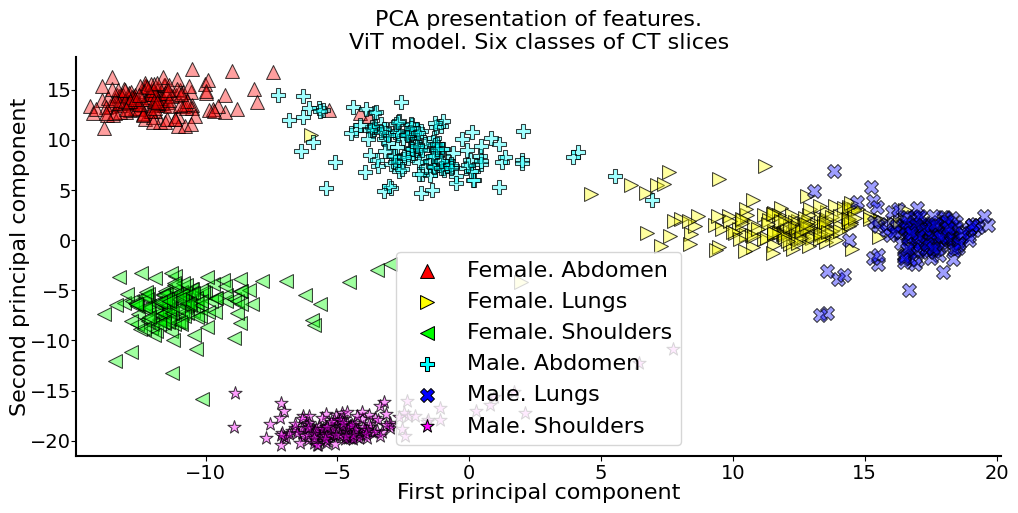

In [11]:
classes = Classes()  # create classes for scatter plot
edgecolor = "#000000C0"
classes.add_class(150, "Female. Abdomen",   "^", "#ff0000", edgecolor)
classes.add_class(150, "Female. Lungs",     ">", "#ffff00", edgecolor)
classes.add_class(150, "Female. Shoulders", "<", "#00ff00", edgecolor)
classes.add_class(150, "Male. Abdomen",     "P", "#00ffff", edgecolor)
classes.add_class(150, "Male. Lungs",       "X", "#0000ff", edgecolor)
classes.add_class(150, "Male. Shoulders",   "*", "#ff00ff", edgecolor)

kwargs = {
    "out_dir":   "./outputs_ViT_c1_c2_c3",
    "csv_file":  "ViT_c1c2c3_PCA.txt",
    "method":    "PCA",  # method name
    "model":     "ViT",  # model name
    "classes":   classes,
    "outname":   "6_classes",
    "title":     ". Six classes of CT slices",
}

get_points_and_show(**kwargs)

### ResNet model. `img_CT_224_Gray_MF_c1_c2_c3` dataset

There are 900 rows in `./outputs_ResNet_c1_c2_c3/XY_c1c2c3.ResNet.coord.PCA.txt` file.


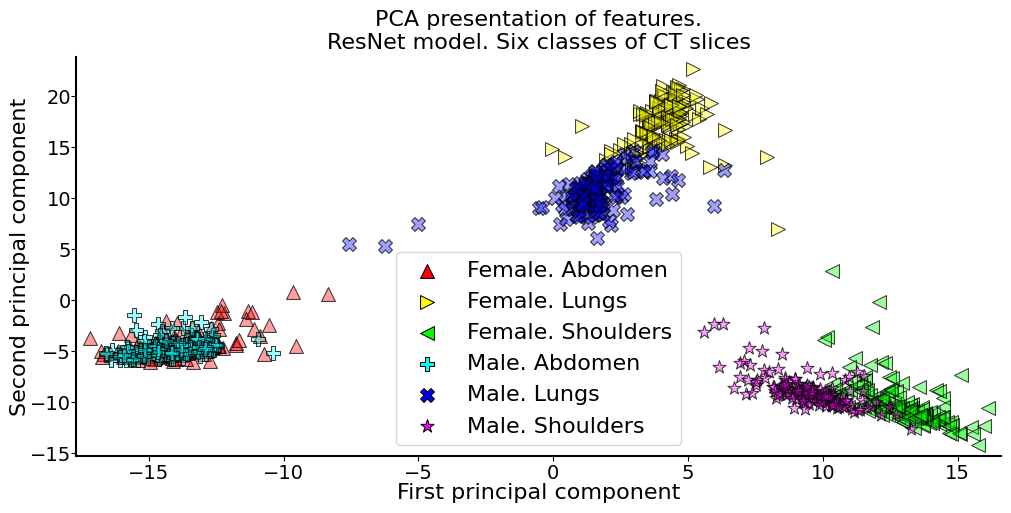

In [12]:
classes = Classes()  # create classes for scatter plot
edgecolor = "#000000C0"
classes.add_class(150, "Female. Abdomen",   "^", "#ff0000", edgecolor)
classes.add_class(150, "Female. Lungs",     ">", "#ffff00", edgecolor)
classes.add_class(150, "Female. Shoulders", "<", "#00ff00", edgecolor)
classes.add_class(150, "Male. Abdomen",     "P", "#00ffff", edgecolor)
classes.add_class(150, "Male. Lungs",       "X", "#0000ff", edgecolor)
classes.add_class(150, "Male. Shoulders",   "*", "#ff00ff", edgecolor)

kwargs = {
    "out_dir":   "./outputs_ResNet_c1_c2_c3",
    "csv_file":  "XY_c1c2c3.ResNet.coord.PCA.txt",
    "method":    "PCA",  # method name
    "model":     "ResNet",  # model name
    "classes":   classes,
    "outname":   "6_classes",
    "title":     ". Six classes of CT slices",
}

get_points_and_show(**kwargs)

### ViT model. `xray` dataset

There are 661 rows in `./xray_dataset/xy__XRay/xy_XRay_NP_ViT_YES_Train_PCA.txt` file.


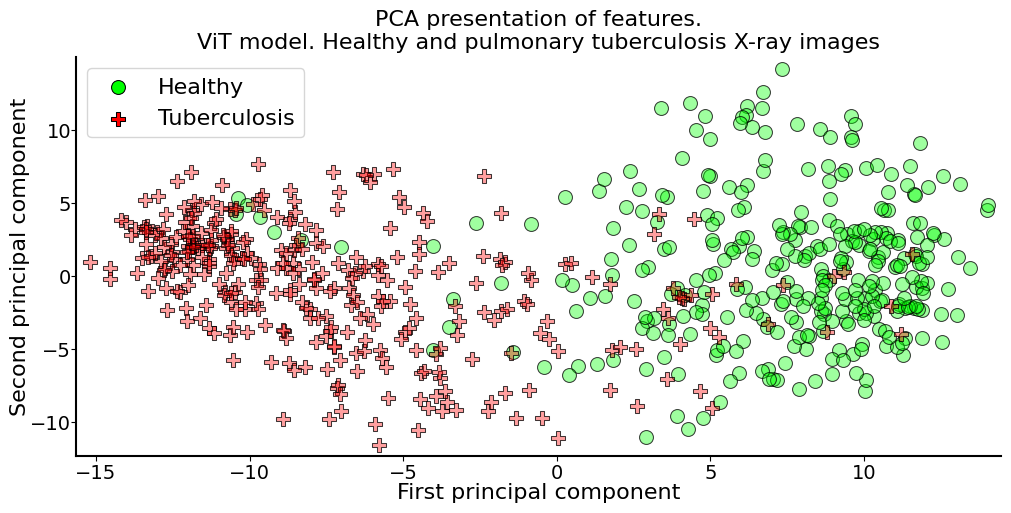

In [13]:
classes = Classes()  # create classes for scatter plot
edgecolor = "#000000C0"
classes.add_class(325, "Healthy",      "o", "#00FF00", edgecolor)
classes.add_class(336, "Tuberculosis", "P", "#FF0000", edgecolor)

kwargs = {
    "out_dir":   "./xray_dataset/xy__XRay",
    "csv_file":  "xy_XRay_NP_ViT_YES_Train_PCA.txt",
    "method":    "PCA",  # method name
    "model":     "ViT",  # model name
    "classes":   classes,
    "outname":   "healthy_tuberculosis",
    "title":     ". Healthy and pulmonary tuberculosis X-ray images",
}

get_points_and_show(**kwargs)

### ResNet model. `xray` dataset

There are 661 rows in `./xray_dataset/xy__XRay/xy__Xray_NP_ResNet_YES_Train_PCA.txt` file.


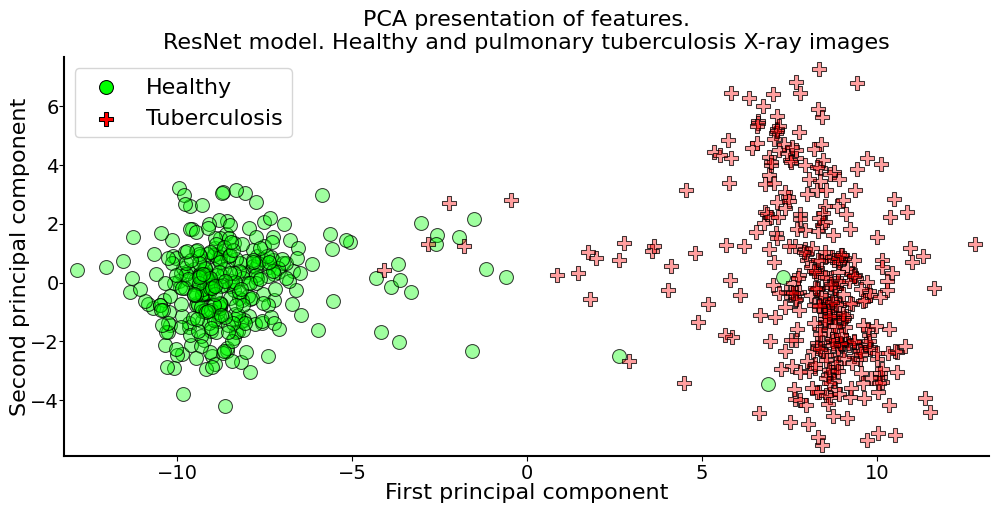

In [14]:
classes = Classes()  # create classes for scatter plot
edgecolor = "#000000C0"
classes.add_class(325, "Healthy",      "o", "#00FF00", edgecolor)
classes.add_class(336, "Tuberculosis", "P", "#FF0000", edgecolor)

kwargs = {
    "out_dir":   "./xray_dataset/xy__XRay",
    "csv_file":  "xy__Xray_NP_ResNet_YES_Train_PCA.txt",
    "method":    "PCA",  # method name
    "model":     "ResNet",  # model name
    "classes":   classes,
    "outname":   "healthy_tuberculosis",
    "title":     ". Healthy and pulmonary tuberculosis X-ray images",
}

get_points_and_show(**kwargs)

### ViT model. `xray` dataset. **NOT trained**

There are 661 rows in `./xray_dataset/xy__XRay/xy_XRay_NP_ViT_NOT_Train_PCA.txt` file.


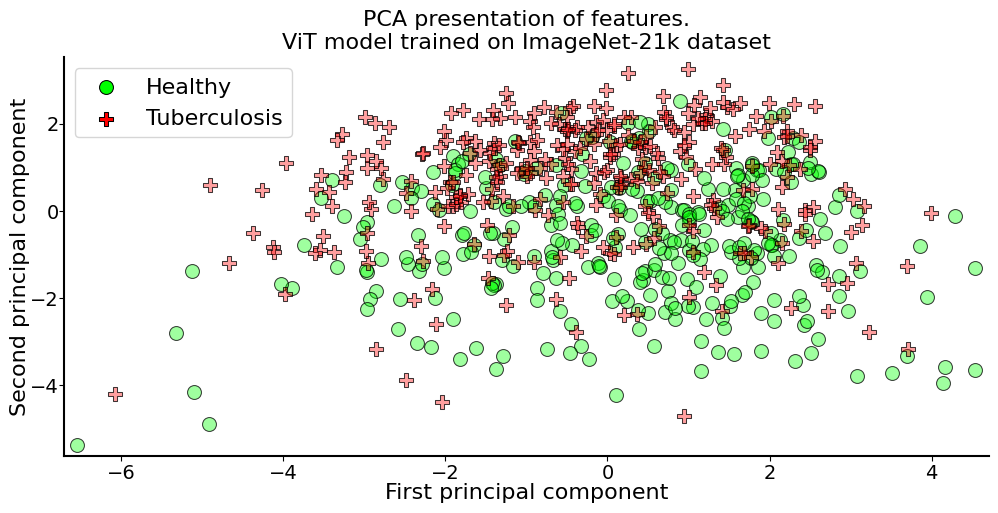

In [15]:
classes = Classes()  # create classes for scatter plot
edgecolor = "#000000C0"
classes.add_class(325, "Healthy",      "o", "#00FF00", edgecolor)
classes.add_class(336, "Tuberculosis", "P", "#FF0000", edgecolor)

kwargs = {
    "out_dir":   "./xray_dataset/xy__XRay",
    "csv_file":  "xy_XRay_NP_ViT_NOT_Train_PCA.txt",
    "method":    "PCA",  # method name
    "model":     "ViT",  # model name
    "classes":   classes,
    "outname":   "not_trained_healthy_tuberculosis",
    "title":     " trained on ImageNet-21k dataset",
}

get_points_and_show(**kwargs)

### ResNet model. `xray` dataset. **NOT trained**

There are 661 rows in `./xray_dataset/xy__XRay/xy__Xray_NP_ResNet_NOT_Train_PCA.txt` file.


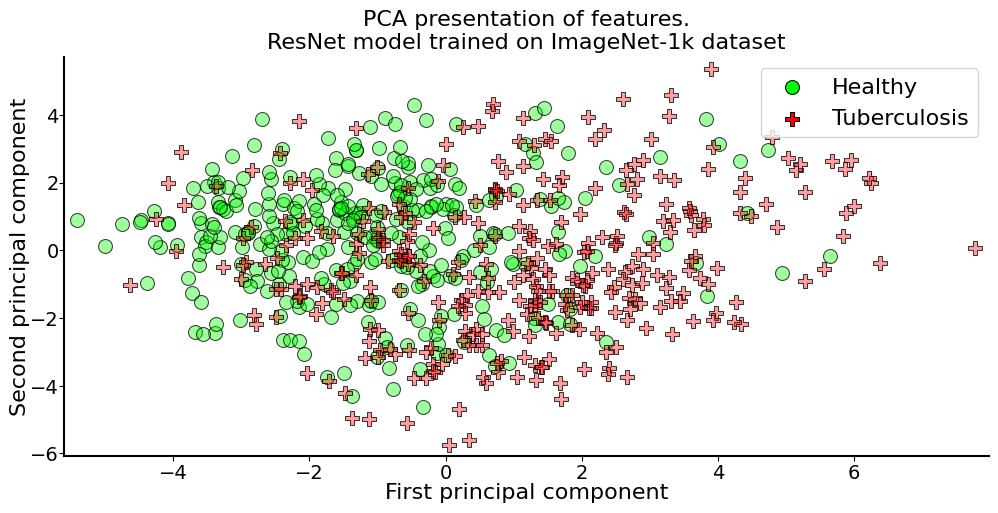

In [16]:
classes = Classes()  # create classes for scatter plot
edgecolor = "#000000C0"
classes.add_class(325, "Healthy",      "o", "#00FF00", edgecolor)
classes.add_class(336, "Tuberculosis", "P", "#FF0000", edgecolor)

kwargs = {
    "out_dir":   "./xray_dataset/xy__XRay",
    "csv_file":  "xy__Xray_NP_ResNet_NOT_Train_PCA.txt",
    "method":    "PCA",  # method name
    "model":     "ResNet",  # model name
    "classes":   classes,
    "outname":   "not_trained_healthy_tuberculosis",
    "title":     " trained on ImageNet-1k dataset",
}

get_points_and_show(**kwargs)

## UMAP method

### ViT model. `img_6K_CT_224_Gray_RG` dataset

There are 2000 rows in `./outputs_ViT_real_generated/RES_UMAP_COORDs_6K_RG_SOU_vs_GEN_v2.csv` file.


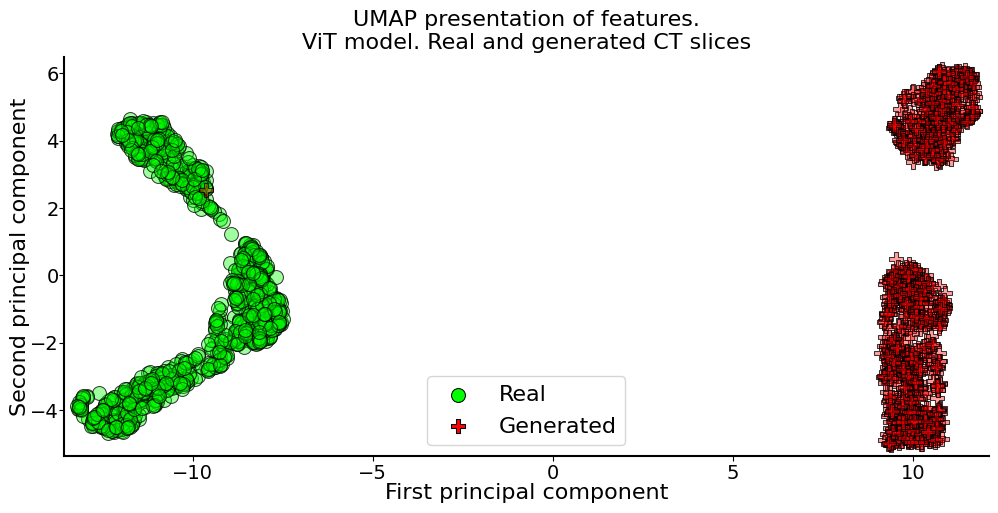

Generated point 1886 (x, y) = (-9.63, 2.54) has x < 0

There are 0 points in (-7.4, 9.1) segment.
Points are in x-range [9.85, 9.85]


In [17]:
classes = Classes()  # create classes for scatter plot
edgecolor = "#000000C0"
classes.add_class(1000, "Real",      "o", "#00FF00", edgecolor)
classes.add_class(1000, "Generated", "P", "#FF0000", edgecolor)

kwargs = {
    "out_dir":   "./outputs_ViT_real_generated",
    "csv_file":  "RES_UMAP_COORDs_6K_RG_SOU_vs_GEN_v2.csv",
    "method":    "UMAP",  # method name
    "model":     "ViT",  # model name
    "classes":   classes,
    "outname":   "real_generated",
    "title":     ". Real and generated CT slices",
    "analyse":   True,  # get some info about point coordinates
    "x_segment": (-7.4, 9.1)  # segment for counting points inside it
}

get_points_and_show(**kwargs)

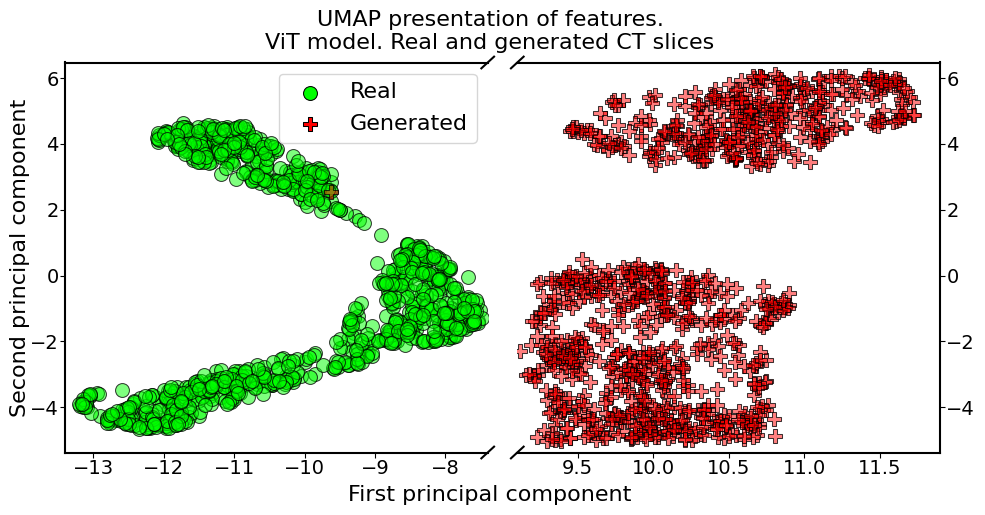

In [18]:
x_lim1, x_lim2 = (-13.4, -7.4), (9.1, 11.9)  # segments to draw plot insite them
show_scatter_plot_v2(classes, x_lim1, x_lim2, IMG_PATH2, TITLE, legend_right=False)

### ResNet model. `img_6K_CT_224_Gray_RG` dataset

There are 2000 rows in `./outputs_ResNet_real_generated/ResNet_RG_coord_UMAP.txt` file.


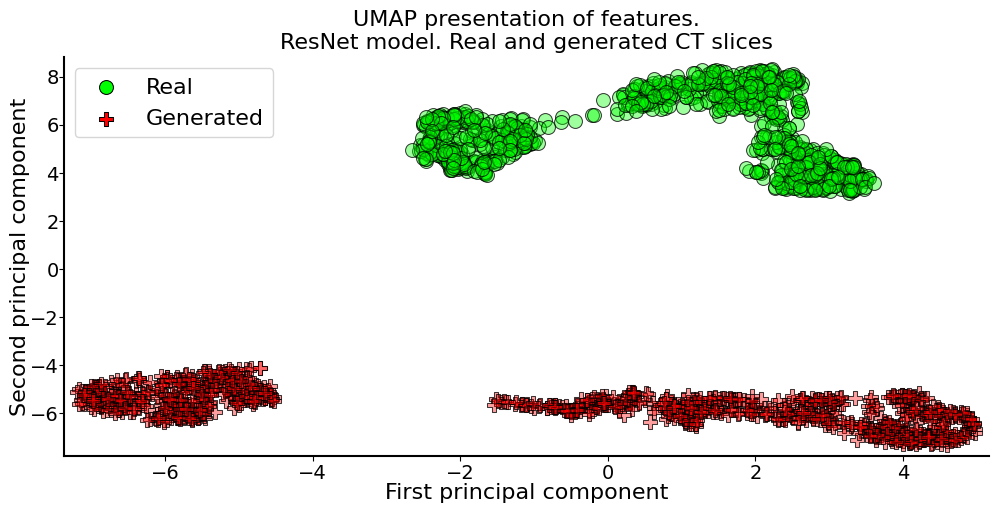

In [19]:
classes = Classes()  # create classes for scatter plot
edgecolor = "#000000C0"
classes.add_class(1000, "Real",      "o", "#00FF00", edgecolor)
classes.add_class(1000, "Generated", "P", "#FF0000", edgecolor)

kwargs = {
    "out_dir":   "./outputs_ResNet_real_generated",
    "csv_file":  "ResNet_RG_coord_UMAP.txt",
    "method":    "UMAP",  # method name
    "model":     "ResNet",  # model name
    "classes":   classes,
    "outname":   "real_generated",
    "title":     ". Real and generated CT slices",
}

get_points_and_show(**kwargs)

### VAE model. `img_6K_CT_224_Gray_RG` dataset

There are 2000 rows in `./outputs_VAE_real_generated/VAE_RES_UMAP_COORDs_6K_RG_SOU_vs_GEN.txt` file.


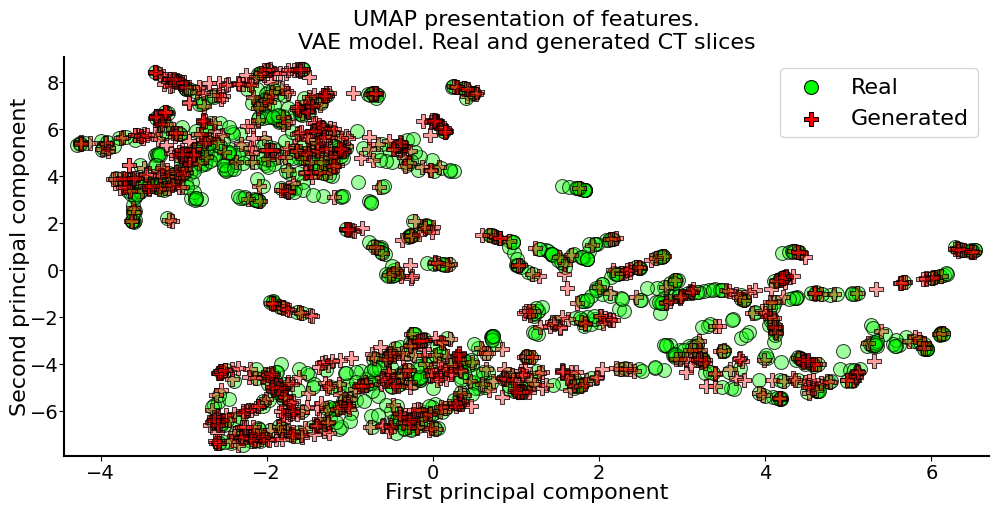

In [20]:
classes = Classes()  # create classes for scatter plot
edgecolor = "#000000C0"
classes.add_class(1000, "Real",      "o", "#00FF00", edgecolor)
classes.add_class(1000, "Generated", "P", "#FF0000", edgecolor)

kwargs = {
    "out_dir":   "./outputs_VAE_real_generated",
    "csv_file":  "VAE_RES_UMAP_COORDs_6K_RG_SOU_vs_GEN.txt",
    "method":    "UMAP",  # method name
    "model":     "VAE",  # model name
    "classes":   classes,
    "outname":   "real_generated",
    "title":     ". Real and generated CT slices",
}

get_points_and_show(**kwargs)

### ViT model. `img_CT_224_Gray_MF_c1_c2_c3` dataset

There are 900 rows in `./outputs_ViT_c1_c2_c3/ViT_c1c2c3_UMAP.txt` file.


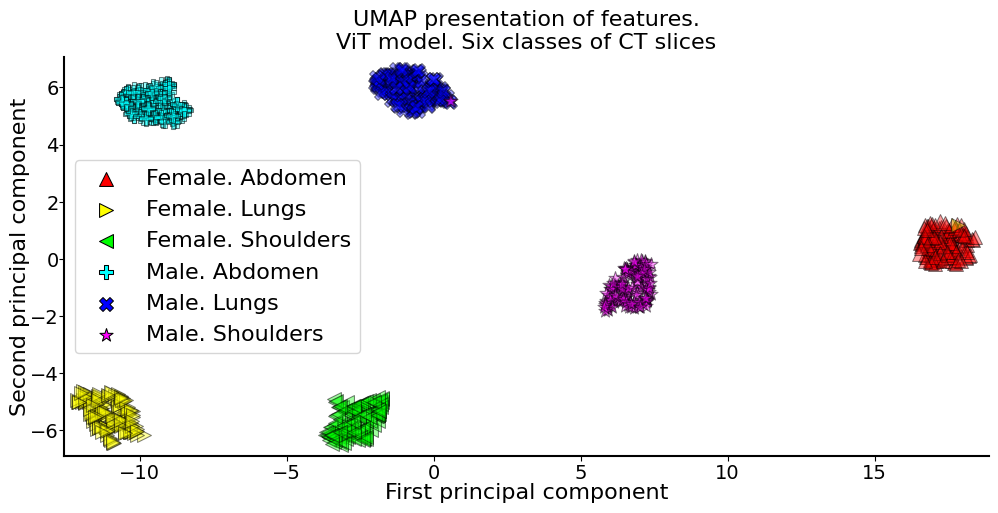

In [21]:
classes = Classes()  # create classes for scatter plot
edgecolor = "#00000080"
classes.add_class(150, "Female. Abdomen",   "^", "#ff0000", edgecolor)
classes.add_class(150, "Female. Lungs",     ">", "#ffff00", edgecolor)
classes.add_class(150, "Female. Shoulders", "<", "#00ff00", edgecolor)
classes.add_class(150, "Male. Abdomen",     "P", "#00ffff", edgecolor)
classes.add_class(150, "Male. Lungs",       "X", "#0000ff", edgecolor)
classes.add_class(150, "Male. Shoulders",   "*", "#ff00ff", edgecolor)

kwargs = {
    "out_dir":   "./outputs_ViT_c1_c2_c3",
    "csv_file":  "ViT_c1c2c3_UMAP.txt",
    "method":    "UMAP",  # method name
    "model":     "ViT",  # model name
    "classes":   classes,
    "outname":   "6_classes",
    "title":     ". Six classes of CT slices",
}

get_points_and_show(**kwargs)

### ResNet model. `img_CT_224_Gray_MF_c1_c2_c3` dataset

There are 900 rows in `./outputs_ResNet_c1_c2_c3/XY_c1c2c3.ResNet.coord.UMAP.txt` file.


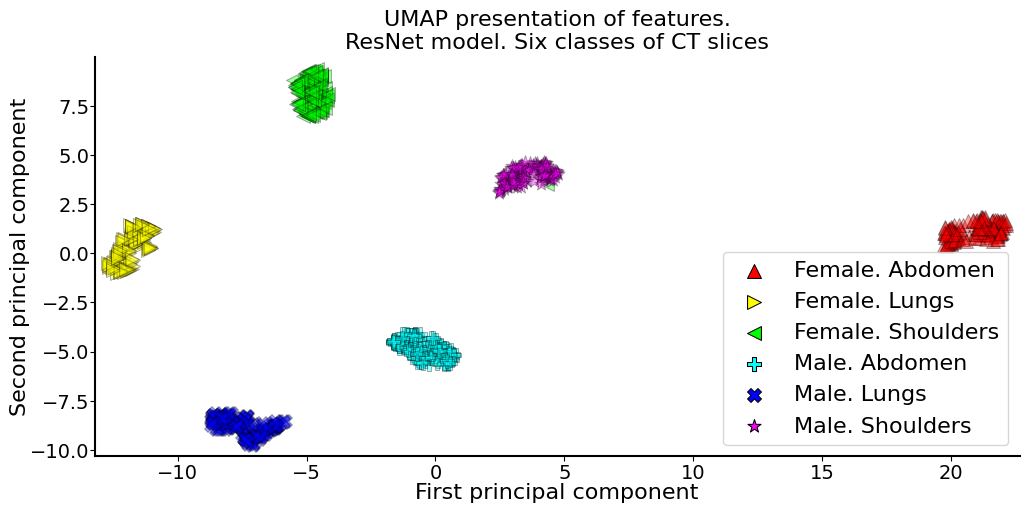

In [22]:
classes = Classes()  # create classes for scatter plot
edgecolor = "#00000050"
classes.add_class(150, "Female. Abdomen",   "^", "#ff0000", edgecolor)
classes.add_class(150, "Female. Lungs",     ">", "#ffff00", edgecolor)
classes.add_class(150, "Female. Shoulders", "<", "#00ff00", edgecolor)
classes.add_class(150, "Male. Abdomen",     "P", "#00ffff", edgecolor)
classes.add_class(150, "Male. Lungs",       "X", "#0000ff", edgecolor)
classes.add_class(150, "Male. Shoulders",   "*", "#ff00ff", edgecolor)

kwargs = {
    "out_dir":   "./outputs_ResNet_c1_c2_c3",
    "csv_file":  "XY_c1c2c3.ResNet.coord.UMAP.txt",
    "method":    "UMAP",  # method name
    "model":     "ResNet",  # model name
    "classes":   classes,
    "outname":   "6_classes",
    "title":     ". Six classes of CT slices",
}

get_points_and_show(**kwargs)

### ViT model. `xray` dataset

There are 661 rows in `./xray_dataset/xy__XRay/xy_XRay_NP_ViT_YES_Train_UMAP.txt` file.


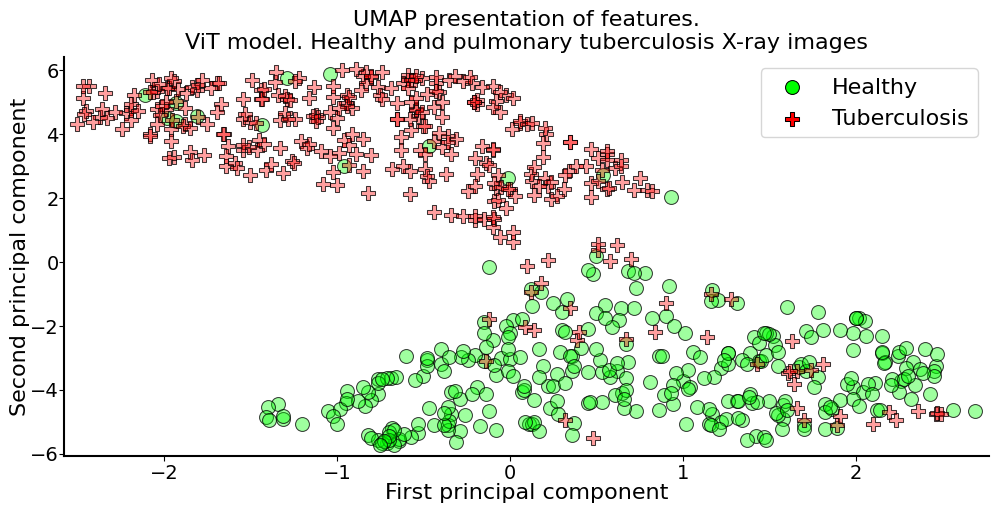

In [23]:
classes = Classes()  # create classes for scatter plot
edgecolor = "#000000C0"
classes.add_class(325, "Healthy",      "o", "#00FF00", edgecolor)
classes.add_class(336, "Tuberculosis", "P", "#FF0000", edgecolor)

kwargs = {
    "out_dir":   "./xray_dataset/xy__XRay",
    "csv_file":  "xy_XRay_NP_ViT_YES_Train_UMAP.txt",
    "method":    "UMAP",  # method name
    "model":     "ViT",  # model name
    "classes":   classes,
    "outname":   "healthy_tuberculosis",
    "title":     ". Healthy and pulmonary tuberculosis X-ray images",
}

get_points_and_show(**kwargs)

### ResNet model. `xray` dataset

There are 661 rows in `./xray_dataset/xy__XRay/xy__Xray_NP_ResNet_YES_Train_UMAP.txt` file.


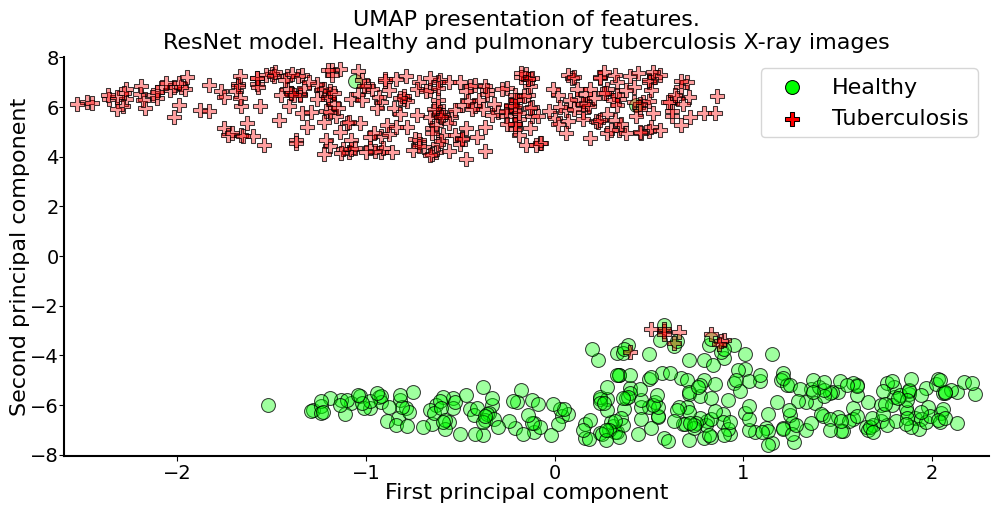

In [24]:
classes = Classes()  # create classes for scatter plot
edgecolor = "#000000C0"
classes.add_class(325, "Healthy",      "o", "#00FF00", edgecolor)
classes.add_class(336, "Tuberculosis", "P", "#FF0000", edgecolor)

kwargs = {
    "out_dir":   "./xray_dataset/xy__XRay",
    "csv_file":  "xy__Xray_NP_ResNet_YES_Train_UMAP.txt",
    "method":    "UMAP",  # method name
    "model":     "ResNet",  # model name
    "classes":   classes,
    "outname":   "healthy_tuberculosis",
    "title":     ". Healthy and pulmonary tuberculosis X-ray images",
}

get_points_and_show(**kwargs)

### ViT model. `xray` dataset. **NOT trained**

There are 661 rows in `./xray_dataset/xy__XRay/xy_XRay_NP_ViT_NOT_Train_UMAP.txt` file.


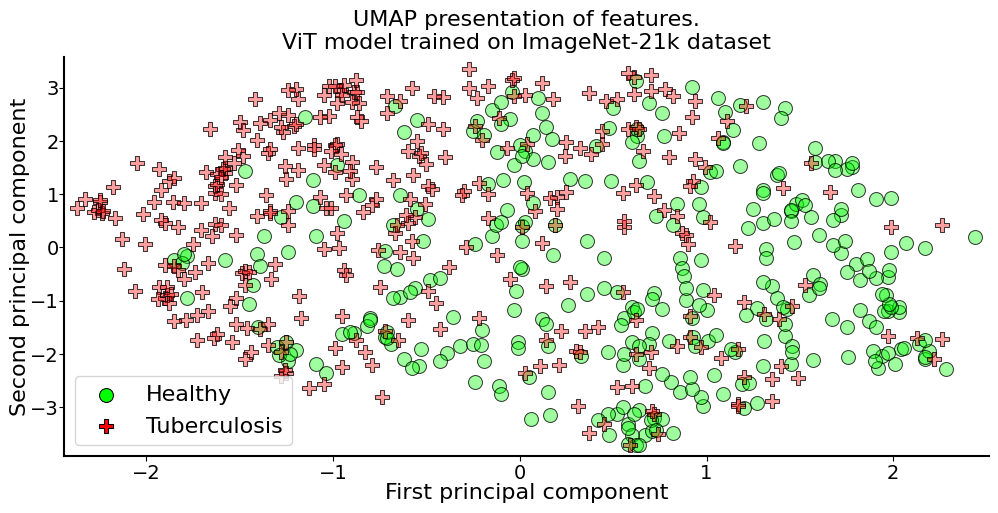

In [25]:
classes = Classes()  # create classes for scatter plot
edgecolor = "#000000C0"
classes.add_class(325, "Healthy",      "o", "#00FF00", edgecolor)
classes.add_class(336, "Tuberculosis", "P", "#FF0000", edgecolor)

kwargs = {
    "out_dir":   "./xray_dataset/xy__XRay",
    "csv_file":  "xy_XRay_NP_ViT_NOT_Train_UMAP.txt",
    "method":    "UMAP",  # method name
    "model":     "ViT",  # model name
    "classes":   classes,
    "outname":   "not_trained_healthy_tuberculosis",
    "title":     " trained on ImageNet-21k dataset",
}

get_points_and_show(**kwargs)

### ResNet model. `xray` dataset. **NOT trained**

There are 661 rows in `./xray_dataset/xy__XRay/xy__Xray_NP_ResNet_NOT_Train_UMAP.txt` file.


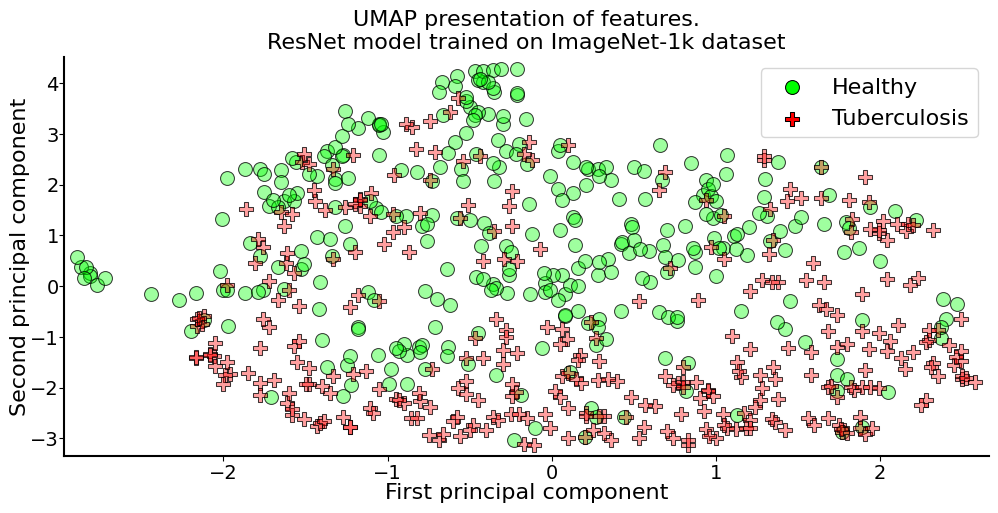

In [26]:
classes = Classes()  # create classes for scatter plot
edgecolor = "#000000C0"
classes.add_class(325, "Healthy",      "o", "#00FF00", edgecolor)
classes.add_class(336, "Tuberculosis", "P", "#FF0000", edgecolor)

kwargs = {
    "out_dir":   "./xray_dataset/xy__XRay",
    "csv_file":  "xy__Xray_NP_ResNet_NOT_Train_UMAP.txt",
    "method":    "UMAP",  # method name
    "model":     "ResNet",  # model name
    "classes":   classes,
    "outname":   "not_trained_healthy_tuberculosis",
    "title":     " trained on ImageNet-1k dataset",
}

get_points_and_show(**kwargs)

## MDS method

### ViT model. `img_6K_CT_224_Gray_RG` dataset

There are 2000 rows in `./outputs_ViT_real_generated/RES_XY_of_MDS_MDS_6K_RG_SOU_vs_GEN.txt` file.


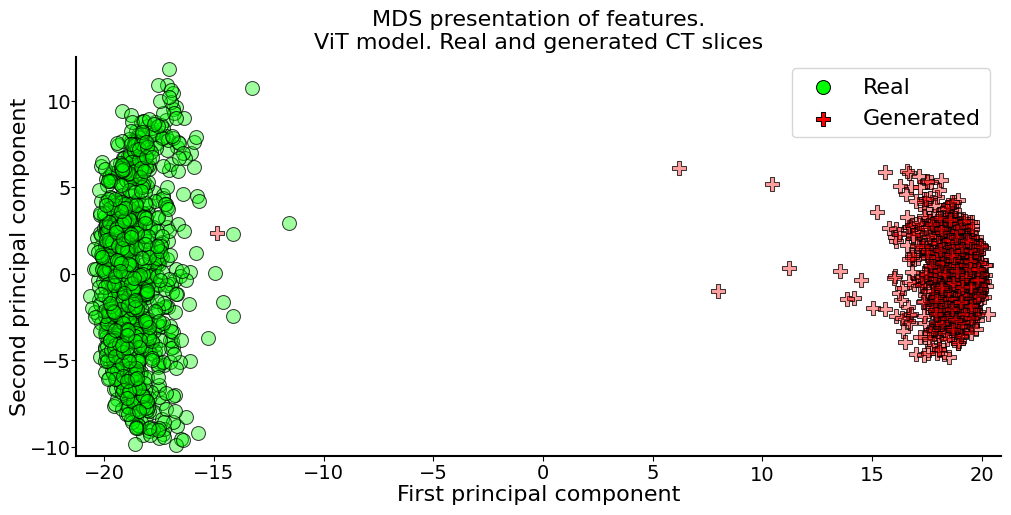

Generated point 1886 (x, y) = (-14.85, 2.35) has x < 0

There are 0 points in (-11.5, 6.2) segment.
Points are in x-range [18.86, 18.86]


In [27]:
classes = Classes()  # create classes for scatter plot
edgecolor = "#000000C0"
classes.add_class(1000, "Real",      "o", "#00FF00", edgecolor)
classes.add_class(1000, "Generated", "P", "#FF0000", edgecolor)

kwargs = {
    "out_dir":   "./outputs_ViT_real_generated",
    "csv_file":  "RES_XY_of_MDS_MDS_6K_RG_SOU_vs_GEN.txt",
    "method":    "MDS",  # method name
    "model":     "ViT",  # model name
    "classes":   classes,
    "outname":   "real_generated",
    "title":     ". Real and generated CT slices",
    "analyse":   True,  # get some info about point coordinates
    "x_segment": (-11.5, 6.2)  # segment for counting points inside it
}

get_points_and_show(**kwargs)

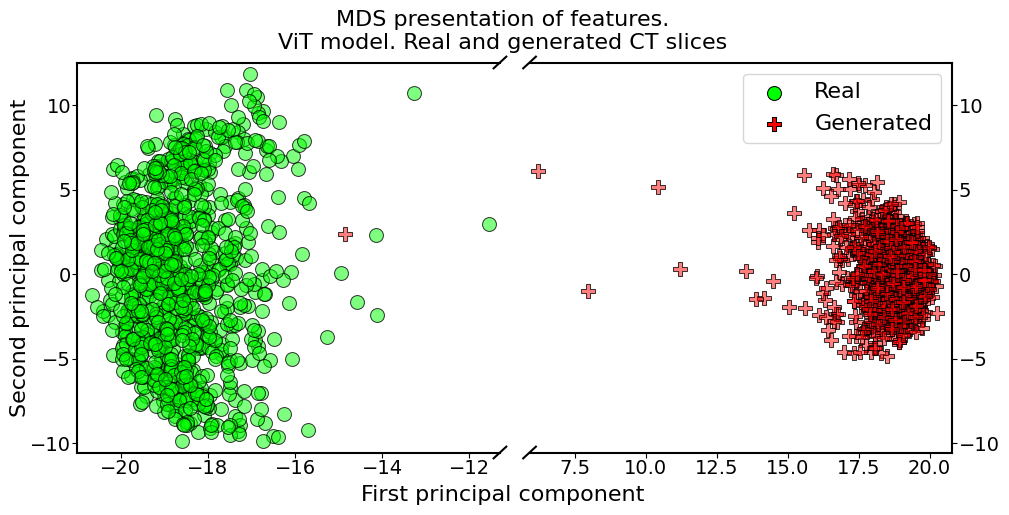

In [28]:
x_lim1, x_lim2 = (-21.0, -11.3), (5.9, 20.8)  # segments to draw plot insite them
show_scatter_plot_v2(classes, x_lim1, x_lim2, IMG_PATH2, TITLE)

### ResNet model. `img_6K_CT_224_Gray_RG` dataset

There are 2000 rows in `./outputs_ResNet_real_generated/ResNet_RG_coord_MDS.txt` file.


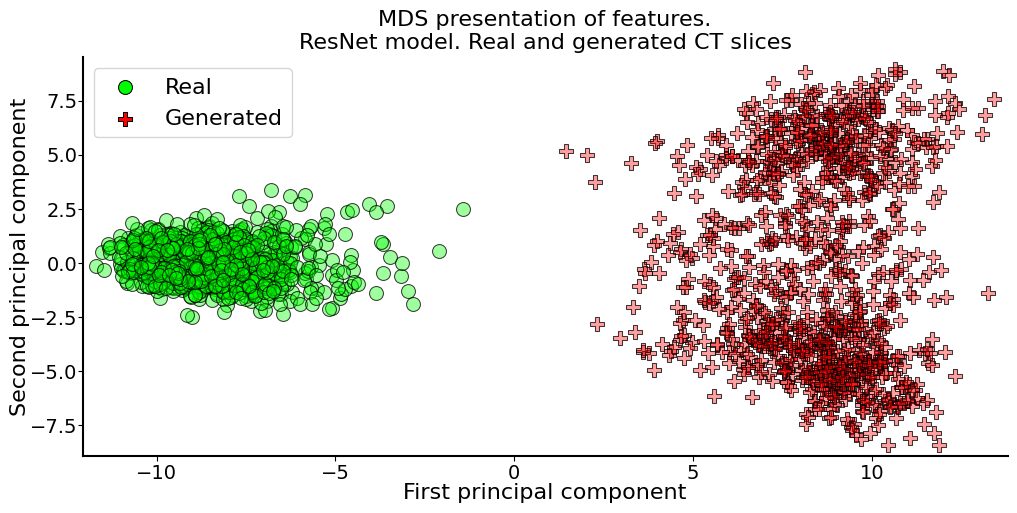

In [29]:
classes = Classes()  # create classes for scatter plot
edgecolor = "#000000C0"
classes.add_class(1000, "Real",      "o", "#00FF00", edgecolor)
classes.add_class(1000, "Generated", "P", "#FF0000", edgecolor)

kwargs = {
    "out_dir":   "./outputs_ResNet_real_generated",
    "csv_file":  "ResNet_RG_coord_MDS.txt",
    "method":    "MDS",  # method name
    "model":     "ResNet",  # model name
    "classes":   classes,
    "outname":   "real_generated",
    "title":     ". Real and generated CT slices",
}

get_points_and_show(**kwargs)

### VAE model. `img_6K_CT_224_Gray_RG` dataset

There are 2000 rows in `./outputs_VAE_real_generated/VAE_RES_MDS_COORDs_6K_RG_SOU_vs_GEN.txt` file.


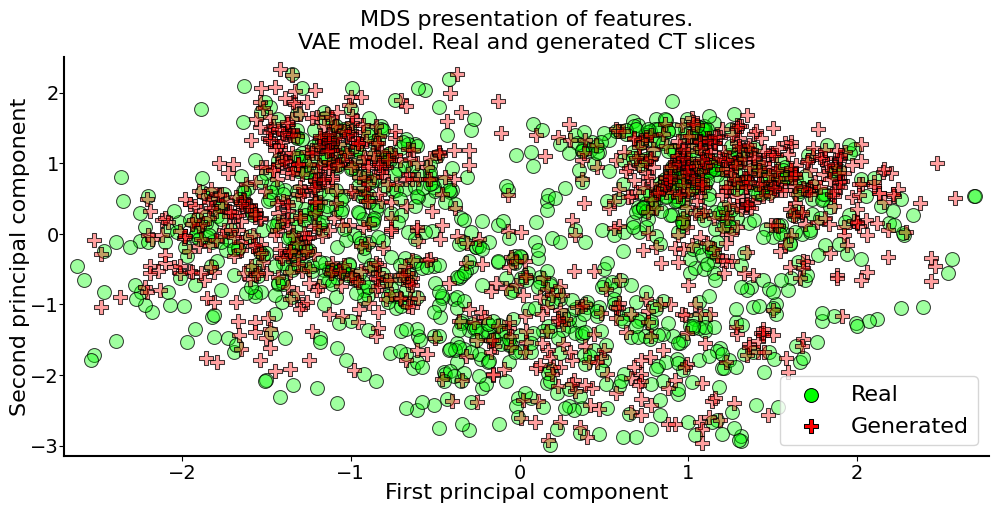

In [30]:
classes = Classes()  # create classes for scatter plot
edgecolor = "#000000C0"
classes.add_class(1000, "Real",      "o", "#00FF00", edgecolor)
classes.add_class(1000, "Generated", "P", "#FF0000", edgecolor)

kwargs = {
    "out_dir":   "./outputs_VAE_real_generated",
    "csv_file":  "VAE_RES_MDS_COORDs_6K_RG_SOU_vs_GEN.txt",
    "method":    "MDS",  # method name
    "model":     "VAE",  # model name
    "classes":   classes,
    "outname":   "real_generated",
    "title":     ". Real and generated CT slices",
}

get_points_and_show(**kwargs)

### ViT model. `img_CT_224_Gray_MF_c1_c2_c3` dataset

There are 900 rows in `./outputs_ViT_c1_c2_c3/ViT_c1c2c3_MDS.txt` file.


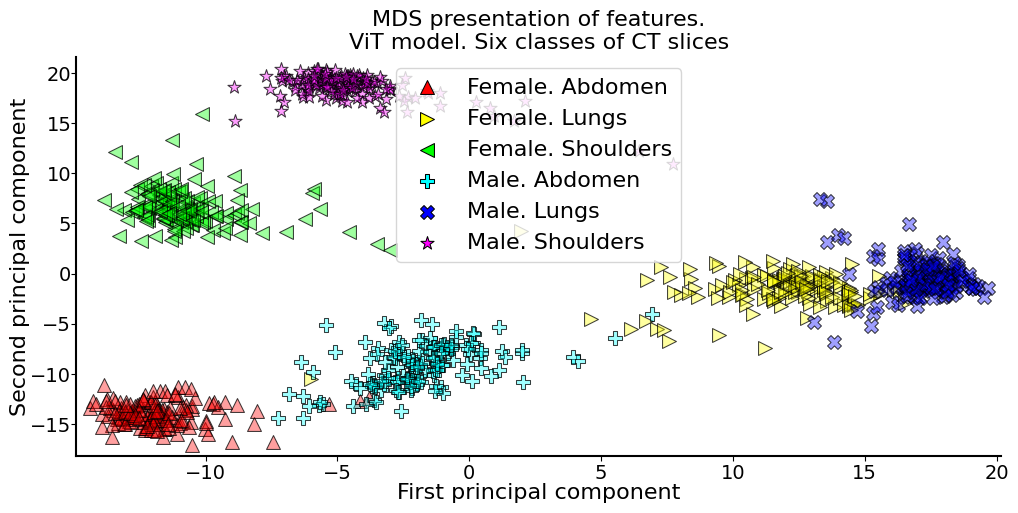

In [31]:
classes = Classes()  # create classes for scatter plot
edgecolor = "#000000C0"
classes.add_class(150, "Female. Abdomen",   "^", "#ff0000", edgecolor)
classes.add_class(150, "Female. Lungs",     ">", "#ffff00", edgecolor)
classes.add_class(150, "Female. Shoulders", "<", "#00ff00", edgecolor)
classes.add_class(150, "Male. Abdomen",     "P", "#00ffff", edgecolor)
classes.add_class(150, "Male. Lungs",       "X", "#0000ff", edgecolor)
classes.add_class(150, "Male. Shoulders",   "*", "#ff00ff", edgecolor)

kwargs = {
    "out_dir":   "./outputs_ViT_c1_c2_c3",
    "csv_file":  "ViT_c1c2c3_MDS.txt",
    "method":    "MDS",  # method name
    "model":     "ViT",  # model name
    "classes":   classes,
    "outname":   "6_classes",
    "title":     ". Six classes of CT slices",
}

get_points_and_show(**kwargs)

### ResNet model. `img_CT_224_Gray_MF_c1_c2_c3` dataset

There are 900 rows in `./outputs_ResNet_c1_c2_c3/XY_c1c2c3.ResNet.coord.MDS.txt` file.


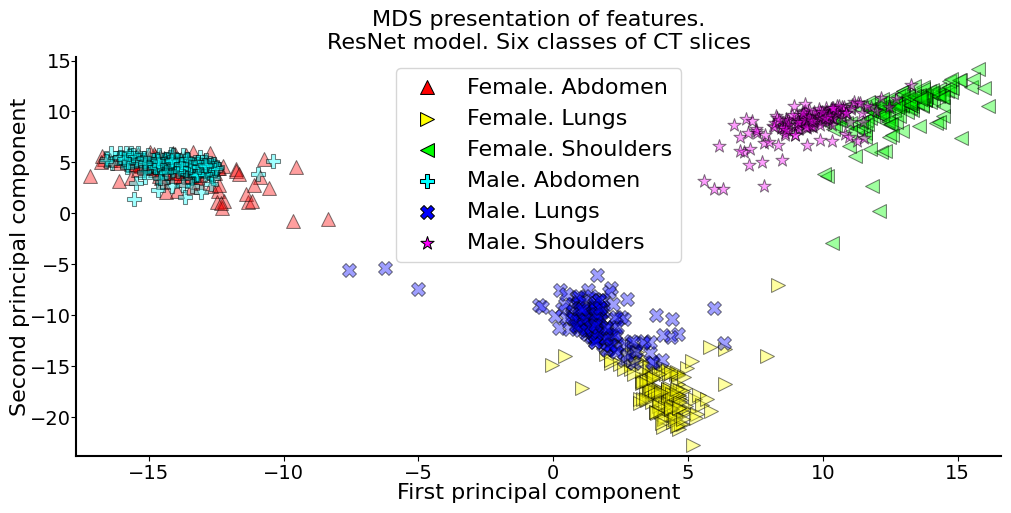

In [32]:
classes = Classes()  # create classes for scatter plot
edgecolor = "#00000080"
classes.add_class(150, "Female. Abdomen",   "^", "#ff0000", edgecolor)
classes.add_class(150, "Female. Lungs",     ">", "#ffff00", edgecolor)
classes.add_class(150, "Female. Shoulders", "<", "#00ff00", edgecolor)
classes.add_class(150, "Male. Abdomen",     "P", "#00ffff", edgecolor)
classes.add_class(150, "Male. Lungs",       "X", "#0000ff", edgecolor)
classes.add_class(150, "Male. Shoulders",   "*", "#ff00ff", edgecolor)

kwargs = {
    "out_dir":   "./outputs_ResNet_c1_c2_c3",
    "csv_file":  "XY_c1c2c3.ResNet.coord.MDS.txt",
    "method":    "MDS",  # method name
    "model":     "ResNet",  # model name
    "classes":   classes,
    "outname":   "6_classes",
    "title":     ". Six classes of CT slices",
}

get_points_and_show(**kwargs)

### ViT model. `xray` dataset

There are 661 rows in `./xray_dataset/xy__XRay/xy_XRay_NP_ViT_YES_Train_MDS.txt` file.


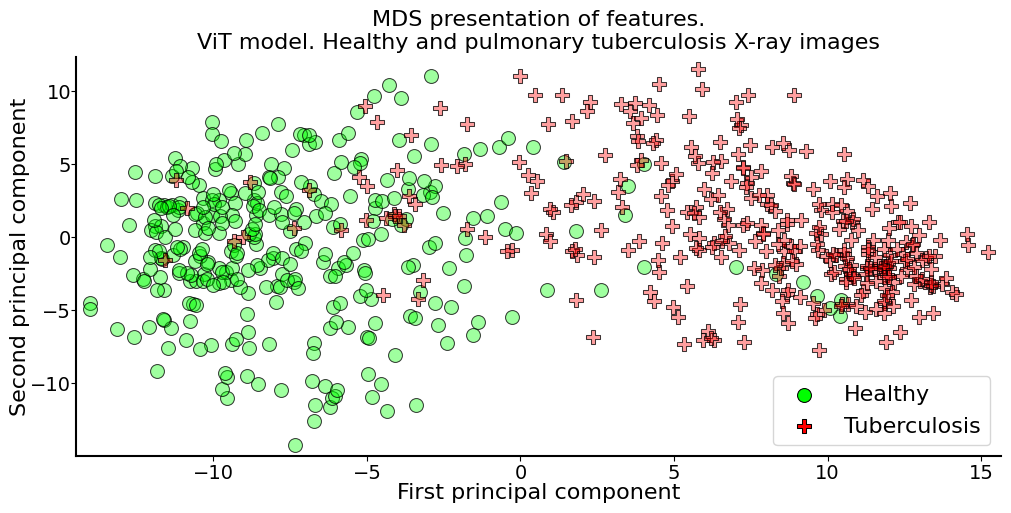

In [33]:
classes = Classes()  # create classes for scatter plot
edgecolor = "#000000C0"
classes.add_class(325, "Healthy",      "o", "#00FF00", edgecolor)
classes.add_class(336, "Tuberculosis", "P", "#FF0000", edgecolor)

kwargs = {
    "out_dir":   "./xray_dataset/xy__XRay",
    "csv_file":  "xy_XRay_NP_ViT_YES_Train_MDS.txt",
    "method":    "MDS",  # method name
    "model":     "ViT",  # model name
    "classes":   classes,
    "outname":   "healthy_tuberculosis",
    "title":     ". Healthy and pulmonary tuberculosis X-ray images",
}

get_points_and_show(**kwargs)

### ResNet model. `xray` dataset

There are 661 rows in `./xray_dataset/xy__XRay/xy__Xray_NP_ResNet_YES_Train_MDS.txt` file.


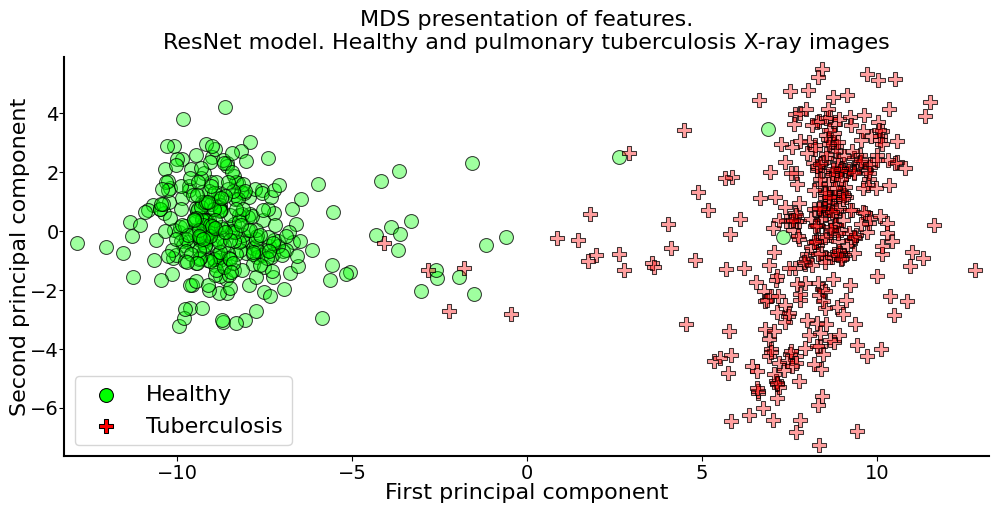

In [34]:
classes = Classes()  # create classes for scatter plot
edgecolor = "#000000C0"
classes.add_class(325, "Healthy",      "o", "#00FF00", edgecolor)
classes.add_class(336, "Tuberculosis", "P", "#FF0000", edgecolor)

kwargs = {
    "out_dir":   "./xray_dataset/xy__XRay",
    "csv_file":  "xy__Xray_NP_ResNet_YES_Train_MDS.txt",
    "method":    "MDS",  # method name
    "model":     "ResNet",  # model name
    "classes":   classes,
    "outname":   "healthy_tuberculosis",
    "title":     ". Healthy and pulmonary tuberculosis X-ray images",
}

get_points_and_show(**kwargs)

### ViT model. `xray` dataset. **NOT trained**

There are 661 rows in `./xray_dataset/xy__XRay/xy_XRay_NP_ViT_NOT_Train_MDS.txt` file.


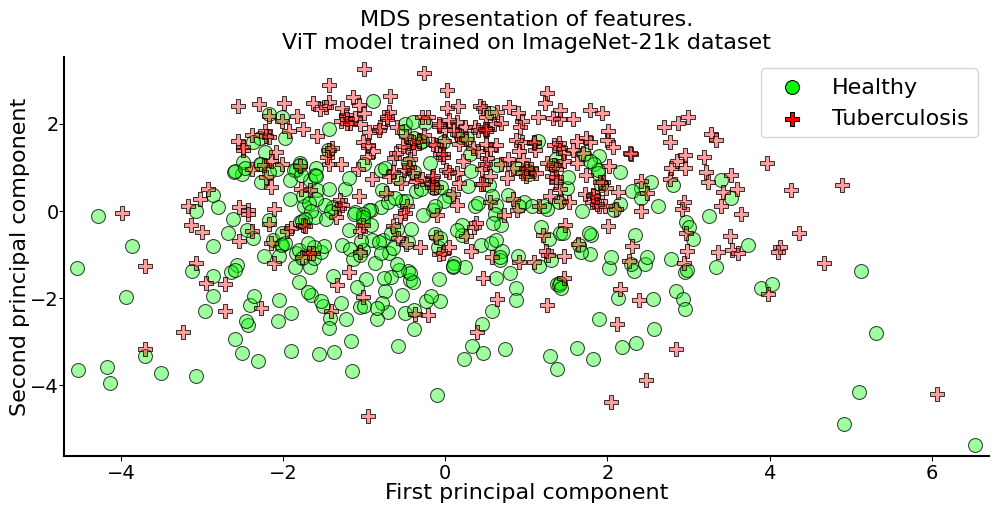

In [35]:
classes = Classes()  # create classes for scatter plot
edgecolor = "#000000C0"
classes.add_class(325, "Healthy",      "o", "#00FF00", edgecolor)
classes.add_class(336, "Tuberculosis", "P", "#FF0000", edgecolor)

kwargs = {
    "out_dir":   "./xray_dataset/xy__XRay",
    "csv_file":  "xy_XRay_NP_ViT_NOT_Train_MDS.txt",
    "method":    "MDS",  # method name
    "model":     "ViT",  # model name
    "classes":   classes,
    "outname":   "not_trained_healthy_tuberculosis",
    "title":     " trained on ImageNet-21k dataset",
}

get_points_and_show(**kwargs)

### ResNet model. `xray` dataset. **NOT trained**

There are 661 rows in `./xray_dataset/xy__XRay/xy__Xray_NP_ResNet_NOT_Train_MDS.txt` file.


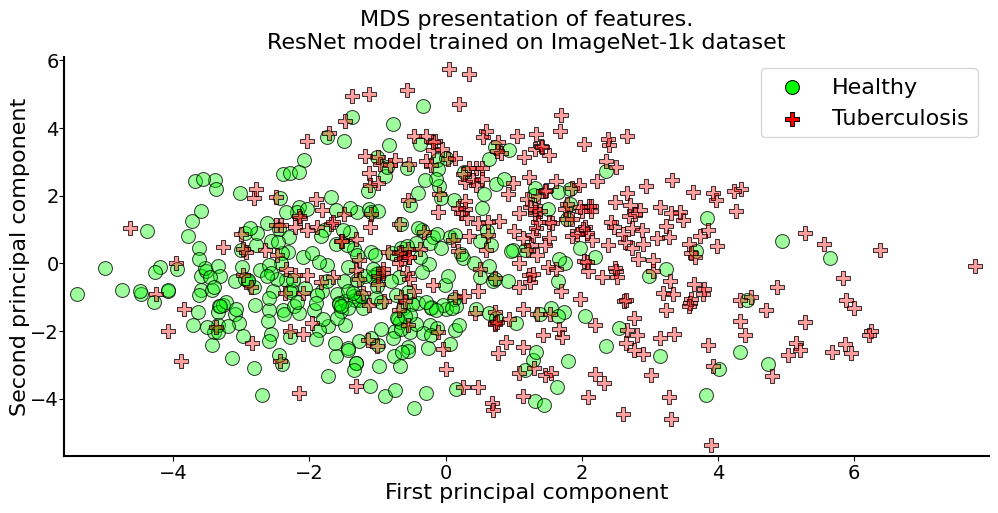

In [36]:
classes = Classes()  # create classes for scatter plot
edgecolor = "#000000C0"
classes.add_class(325, "Healthy",      "o", "#00FF00", edgecolor)
classes.add_class(336, "Tuberculosis", "P", "#FF0000", edgecolor)

kwargs = {
    "out_dir":   "./xray_dataset/xy__XRay",
    "csv_file":  "xy__Xray_NP_ResNet_NOT_Train_MDS.txt",
    "method":    "MDS",  # method name
    "model":     "ResNet",  # model name
    "classes":   classes,
    "outname":   "not_trained_healthy_tuberculosis",
    "title":     " trained on ImageNet-1k dataset",
}

get_points_and_show(**kwargs)

## Drafts and experiments

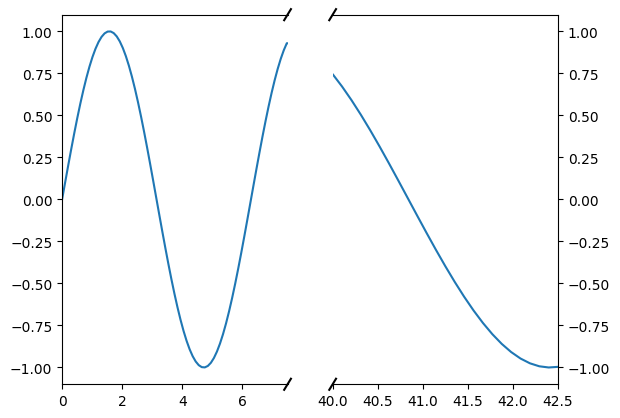

In [37]:
"""
Broken axis example, where the x-axis will have a portion cut out.
Original: https://stackoverflow.com/a/32186074/7550928
"""
import matplotlib.pylab as plt
import numpy as np


x = np.linspace(0, 10, 100)
x[75:] = np.linspace(40, 42.5, 25)

y = np.sin(x)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, facecolor='w')

# plot the same data on both axes
ax1.plot(x, y)
ax2.plot(x, y)

ax1.set_xlim(0, 7.5)
ax2.set_xlim(40, 42.5)

# hide the spines between ax and ax2
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax1.yaxis.tick_left()
ax2.yaxis.tick_right()
ax2.tick_params(labelright='off')

# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0, 0), (0, 1),
# (1, 0), and (1, 1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1-d, 1+d), ( -d,  +d), **kwargs)
ax1.plot((1-d, 1+d), (1-d, 1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1-d, 1+d), **kwargs)
ax2.plot((-d, +d), ( -d,  +d), **kwargs)

# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

plt.show()